<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/Fraud_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

In [ ]:
# Load datasets
credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv")

In [ ]:
credit

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [ ]:
credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
credit.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
credit.shape

(568630, 31)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X = credit.drop(['Class'], axis=1)
y = credit['Class']


**Data Loading & Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

# Load datasets
credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard_2023.csv")


# Prepare financial dataset
X_fin = credit.drop("Class", axis=1)
y_fin = credit["Class"]

# Standardization
scaler = StandardScaler()
X_fin_scaled = scaler.fit_transform(X_fin)

# Handle imbalance
smote = SMOTEENN()
X_fin_res, y_fin_res = smote.fit_resample(X_fin_scaled, y_fin)


KeyboardInterrupt: 

In [ ]:
y.value_counts() # After SMOTEENN

,count
Class,
0,284315
1,284315


**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "LR": LogisticRegression(max_iter=2000),
    "RF": RandomForestClassifier(n_estimators=300),
    "XGB": XGBClassifier(eval_metric="logloss")
}

for name, model in models.items():
    model.fit(X_fin_res, y_fin_res)
    preds = model.predict(X_fin_scaled)
    auc = roc_auc_score(y_fin, model.predict_proba(X_fin_scaled)[:,1])
    print(name, "AUC:", auc)
    print(classification_report(y_fin, preds))


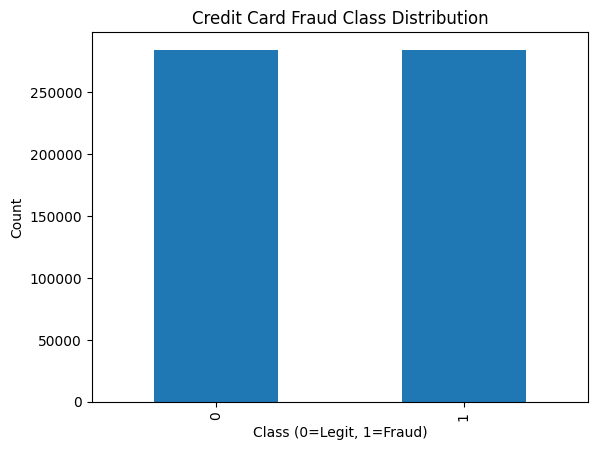

In [ ]:
import matplotlib.pyplot as plt

credit["Class"].value_counts().plot(kind='bar')
plt.title("Credit Card Fraud Class Distribution")
plt.xlabel("Class (0=Legit, 1=Fraud)")
plt.ylabel("Count")
plt.show()

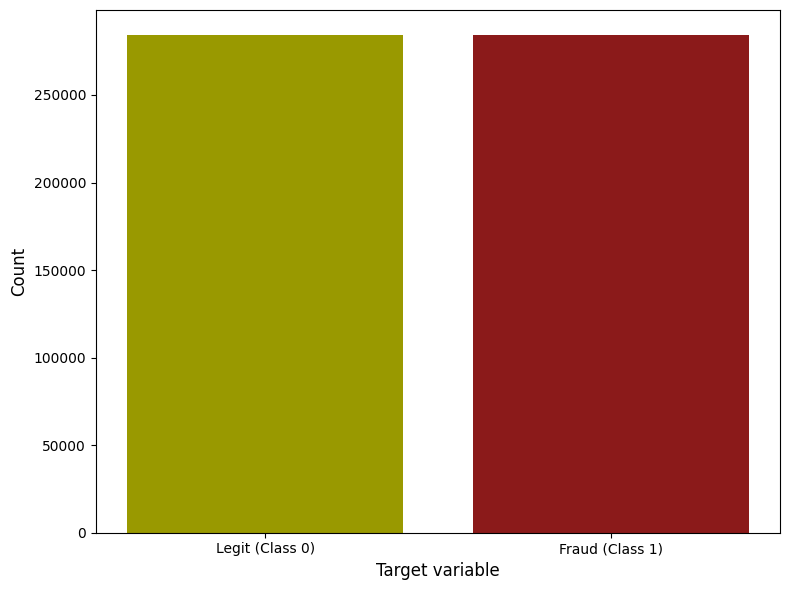

In [ ]:
import matplotlib.pyplot as plt

# Manually define the counts for each class
class_counts = {
    "Legit (Class 0)": 284315,  # Replace with your actual count for Class 0
    "Fraud (Class 1)": 284315      # Replace with your actual count for Class 1
}

# Extract labels and values from the dictionary
labels = list(class_counts.keys())
values = list(class_counts.values())

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(labels, values, color=['#999900', '#8B1A1A'])  # Use different colors for better distinction

# Add title and labels
#plt.title("Credit Card Fraud Class Distribution", fontsize=12)
plt.xlabel("Target variable", fontsize=12)
plt.ylabel("Count", fontsize=12)


# Display the bar plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_fin_scaled, y_fin)
plt.title("ROC Curves for Financial Fraud Models")
plt.show()

In [ ]:
# Load datasets
provider= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combined_nhis_dataset_with_fraud_types (1).csv")
provider

,Patient ID,AGE,GENDER,DATE OF ENCOUNTER,DATE OF DISCHARGE,Amount Billed,DIAGNOSIS,FRAUD_TYPE
0,1,25.0,F,2025-02-11,2025-02-11,16800.0,CYESIS LMP,Phantom Billing
1,2,30.0,M,2025-02-13,2025-02-13,6300.0,WAX IMPACTION,Wrong Diagnosis
2,3,35.0,M,2025-02-13,2025-02-13,6160.0,CYESIS LMP,Wrong Diagnosis
3,4,48.0,M,2025-02-18,2025-02-18,0.0,TONSILITIS OBSTRUCTIVE SLEEP APEANA,Ghost Enrollee
4,5,58.0,F,2025-02-18,2025-02-18,8400.0,REFRACTIVE ERROR,No Fraud
...,...,...,...,...,...,...,...,...
20383,19996,36.0,F,2024-06-27 00:00:00,2020-10-18 00:00:00,18562.0,HHDX HEART FAILURE HTN,Phantom Billing
20384,19997,50.0,M,2020-07-11 00:00:00,2020-11-21 00:00:00,11893.0,HUMERUS FRACTURE,No Fraud
20385,19998,29.0,M,2023-07-06 00:00:00,2021-10-13 00:00:00,5980.0,EARLY CYESIS IN A KNOWN PCOS & DM Pt WITH POOR...,Wrong Diagnosis
20386,19999,43.0,M,2024-03-24 00:00:00,2023-11-06 00:00:00,10696.0,SOLITARY RGT UPPER CERVICAL LYMPH ADENOPHATY C...,Phantom Billing


In [ ]:
provider.shape

(20388, 8)

In [ ]:
provider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20388 entries, 0 to 20387
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient ID         20388 non-null  int64  
 1   AGE                20388 non-null  float64
 2   GENDER             20388 non-null  object 
 3   DATE OF ENCOUNTER  19847 non-null  object 
 4   DATE OF DISCHARGE  19729 non-null  object 
 5   Amount Billed      20388 non-null  float64
 6   DIAGNOSIS          20350 non-null  object 
 7   FRAUD_TYPE         20388 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


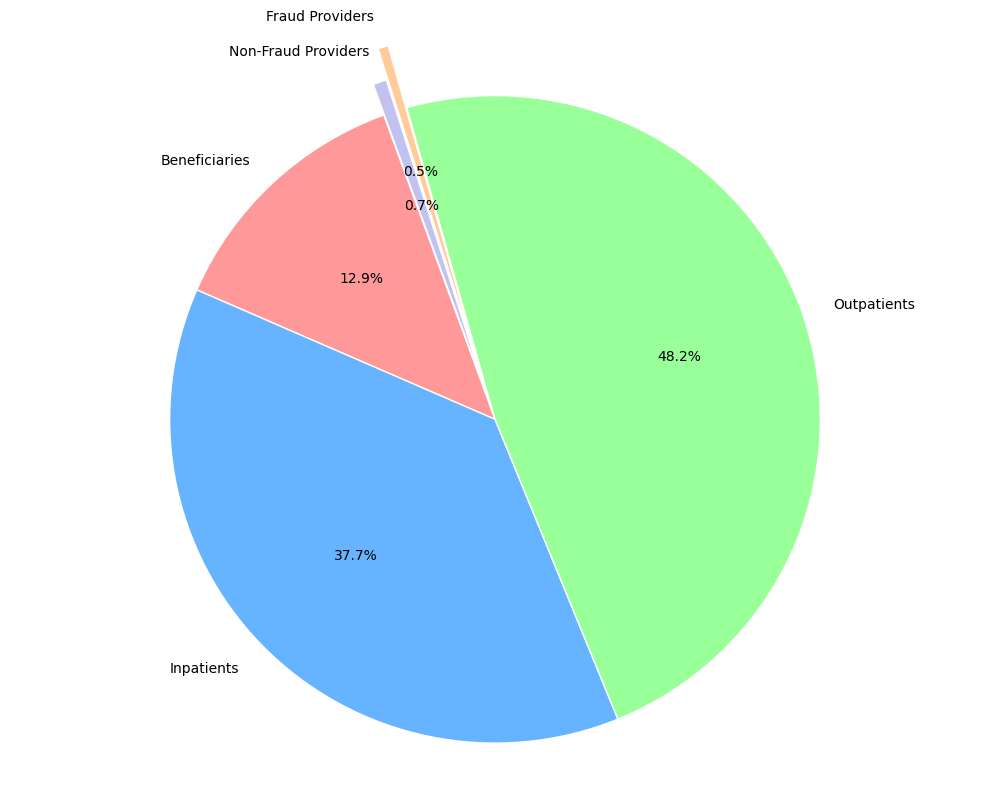

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Beneficiaries', 'Inpatients', 'Outpatients', 'Fraud Providers', 'Non-Fraud Providers']
sizes = [138556, 404983, 517737, 5534, 7216]

# Define colors for better visualization
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = [0, 0, 0, 0.2, 0.1]
# Create the pie chart
plt.figure(figsize=(10, 8))  # Set figure size
plt.pie(sizes, labels=labels,  colors=colors, explode = explode, autopct='%1.1f%%', startangle=110,
      wedgeprops = {"linewidth": 1, "edgecolor": "white"})



# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
plt.hist(reconstruction_error[y_fin==0], bins=50, alpha=0.6, label="Legit")
plt.hist(reconstruction_error[y_fin==1], bins=50, alpha=0.6, label="Fraud")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()